In [1]:
import spikeinterface.full as si
import matplotlib.pyplot as plt
import numpy as np
import probeinterface as pi
from pathlib import Path
import os 
import pandas as pd 



basefolder="D:/3556-17/3556-17_recall_g0"


event =  si.read_spikeglx(basefolder, stream_id='nidq', load_sync_channel=False)
recording =  si.read_spikeglx(basefolder, stream_id='nidq', load_sync_channel=False)
print(recording)

SpikeGLXRecordingExtractor: 9 channels - 11573.700000 Hz - 1 segments - 28,373,992 samples 
                            2,451.59s (40.86 minutes) - int16 dtype - 487.07 MiB


C:\Users\Freitag\AppData\Local\anaconda3\envs\si_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


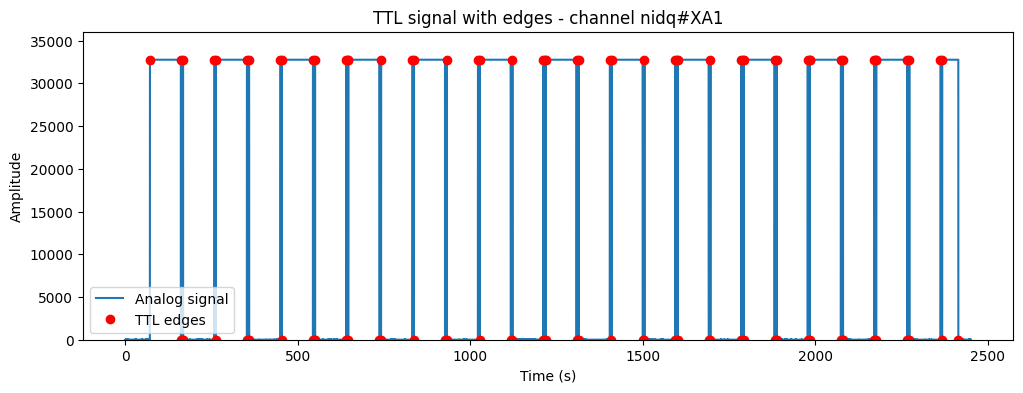

TTL edge times saved to 'ttl_edge_times.csv'


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Setup ---
channel_idx = 1  # Adjust as needed
channel_id = event.get_channel_ids()[channel_idx]
sf = event.get_sampling_frequency()

# --- Load entire trace ---
trace = event.get_traces(channel_ids=[channel_id])
signal = trace[:, 0]
time_vector = np.arange(len(signal)) / sf

# --- TTL edge detection ---
def extract_ttl_edges(signal, time_vector, threshold=1000):
    above_threshold = signal > threshold
    changes = np.diff(above_threshold.astype(int))
    
    rising_indices = np.where(changes == 1)[0] + 1
    falling_indices = np.where(changes == -1)[0] + 1

    edge_indices = np.concatenate((rising_indices, falling_indices))
    edge_types = np.array(['rising'] * len(rising_indices) + ['falling'] * len(falling_indices))

    sort_order = np.argsort(edge_indices)
    edge_indices = edge_indices[sort_order]
    edge_types = edge_types[sort_order]

    edge_times = time_vector[edge_indices]

    return edge_times, edge_types, edge_indices

edge_times, edge_types, edge_indices = extract_ttl_edges(signal, time_vector, threshold=100)

# --- Plot with markers ---
plt.figure(figsize=(12, 4))
plt.plot(time_vector, signal, label='Analog signal')
plt.plot(edge_times, signal[edge_indices], 'ro', label='TTL edges')
plt.title(f"TTL signal with edges - channel {channel_id}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.ylim(0, max(signal) * 1.1)
plt.show()

# --- Save to CSV ---
df_edges = pd.DataFrame({
    'time_seconds': edge_times,
    'edge_type': edge_types
})
df_edges.to_csv("D:/3556-17/3556-17_recall_g0/Meta/ttl_edge_times.csv", index=False)
print("TTL edge times saved to 'ttl_edge_times.csv'")



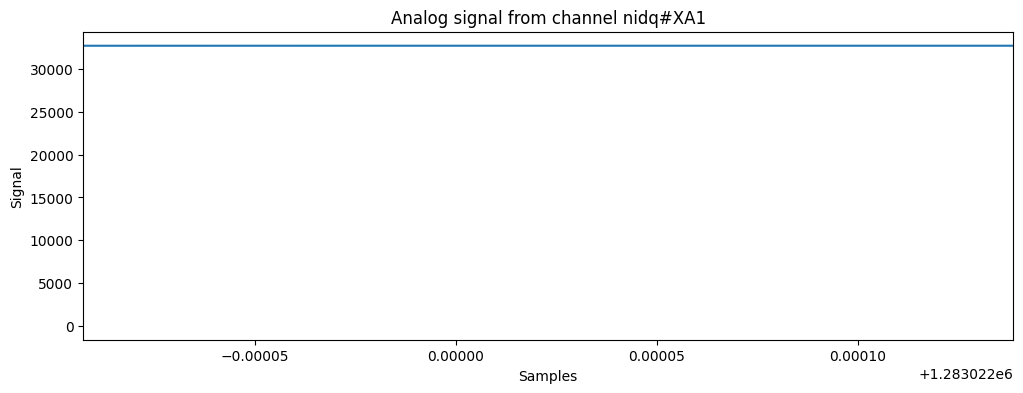

In [81]:

# Get sampling frequency
channel_idx =1# or 1, 2, etc., depending on which channel you want
channel_id = event.get_channel_ids()[channel_idx]

# Get trace from that single channel (e.g., first 5 seconds)
sf = event.get_sampling_frequency()
duration = 1000# seconds
trace = event.get_traces(
    start_frame=0,
    end_frame=int(sf * duration),
    channel_ids=[channel_id]
)


# Plot
plt.figure(figsize=(12, 4))
plt.plot(trace[:, 0])
plt.title(f"Analog signal from channel {channel_id}")
plt.xlabel("Samples")
plt.ylabel("Signal")
plt.xlim(110.85668368*sf,110.8566837*sf)
#plt.ylim(0,100)
plt.show()




In [53]:
import numpy as np
channel_ids = event.get_channel_ids()
ttl_channel_idx = 1
trace = event.get_traces(channel_ids=[channel_ids[ttl_channel_idx]])

# Detect rising edges (assuming TTL goes from 0 to high value)
threshold = 15000 # Adjust based on signal
above_thresh = trace[:, 0] < threshold
rising_edges = np.where(np.diff(above_thresh.astype(int)) == 1)[0]

# Convert to times in seconds
rising_times = rising_edges / sf
print("TTL rising edge times:", rising_times)
print(len(rising_times))
df = pd.DataFrame(rising_times)
#df.to_csv('C:/Users/Freitag/Desktop/soundtry.csv')
print(df)
print(len(df)/(df.max()-df.min() ) )

TTL rising edge times: [ 200.8571157   206.49109619  296.59158264  302.59156536  392.62534885
  397.72536008  398.74664109  488.84712754  494.84719666  584.90793782
  590.00794906  591.05221321  686.05268842  776.36944106  781.70265343
  876.70312865  967.0172028   972.32864166 1067.32903047 1157.63100823
 1162.73101947 1163.74175933 1253.84215938 1259.8422285  1349.85259684
 1354.95260807 1355.9745803  1450.97505551 1541.05800219 1546.15801343
 1547.17134538 1642.17182059 1732.48546273 1737.58547396 1738.60001555
 1828.7004156  1834.70048472 1924.71102586 1930.01563891 2020.11603895
 2026.11610807 2116.13010533 2121.23011656 2122.2402516  2217.24072682
 2307.52620165 2312.62621288 2313.63600232 2403.73640236 2409.73647148
 2499.74830867 2505.06156199 2595.16196203 2601.16203116 2691.17507798
 2696.25461175 2791.25508696 2881.33915688 2886.41255605 2976.5130425
 2982.51302522 3072.52451679 3077.62452802 3078.63526789 3173.63574311
 3263.70823505 3268.80824628 3269.82010939 3359.9205958

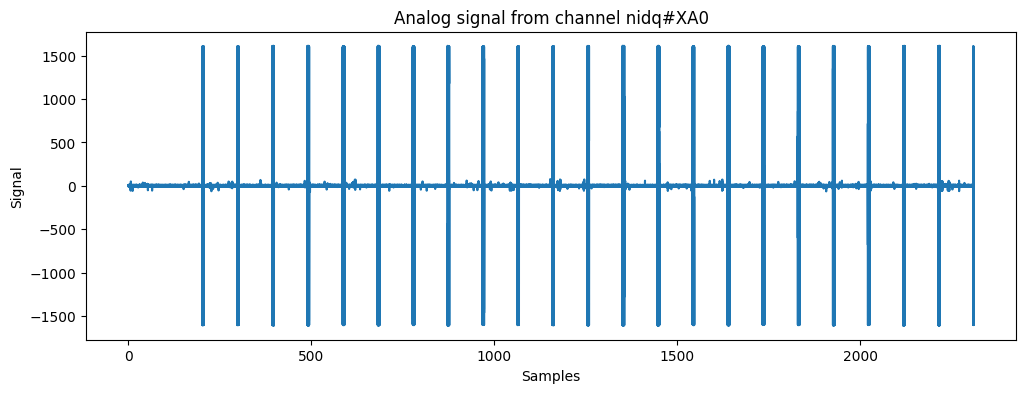

In [46]:
channel_idx =0# or 1, 2, etc., depending on which channel you want
channel_id = event.get_channel_ids()[channel_idx]

# Get trace from that single channel (e.g., first 5 seconds)
sf = event.get_sampling_frequency()
duration = 26738496 # seconds
trace = event.get_traces(
    start_frame=0,
    end_frame=int(duration),
    channel_ids=[channel_id]
)
time_axis = np.arange(26738496) / sf
# Plot
plt.figure(figsize=(12, 4))
plt.plot(time_axis,trace[:, 0])
plt.title(f"Analog signal from channel {channel_id}")
plt.xlabel("Samples")
plt.ylabel("Signal")


plt.show()


TTL rising edge times: [8.64027925e-05 3.45611170e-04 5.18416755e-04 ... 2.45159050e+03
 2.45159111e+03 2.45159180e+03]
6914119
[0 0 0 ... 0 0 0]


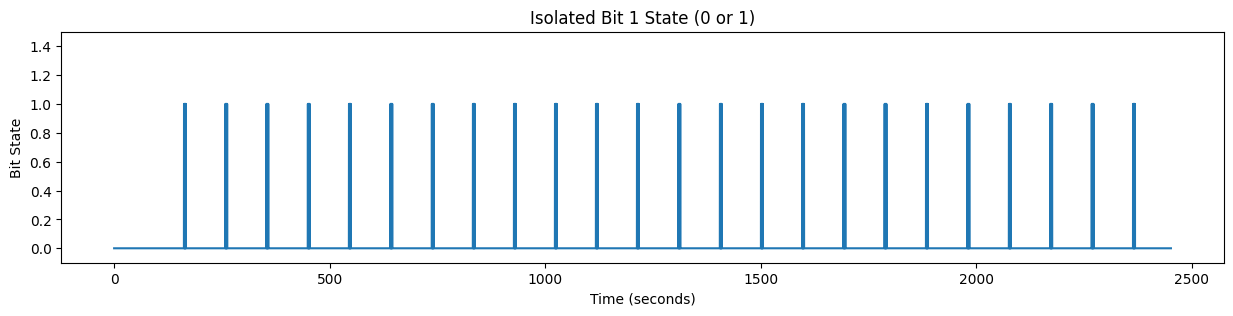

Extracted TTL event timestamps for bit 1 saved to soundttl.csv


In [3]:
import numpy as np
channel_ids = event.get_channel_ids()
ttl_channel_idx = 0
trace = event.get_traces(channel_ids=[channel_ids[ttl_channel_idx]])
sf = event.get_sampling_frequency()
# Detect rising edges (assuming TTL goes from 0 to high value)
threshold = 0.5 # Adjust based on signal
above_thresh = trace[:, 0] > threshold
rising_edges = np.where(np.diff(above_thresh.astype(int)) == 1)[0]

# Convert to times in seconds
rising_times = rising_edges / sf
print("TTL rising edge times:", rising_times)
print(len(rising_times))
df = pd.DataFrame(rising_times)
#df.to_csv('C:/Users/Freitag/Desktop/digital1.csv')


def extract_and_save_ttl_events(data, bits, save_path):
    digital_signals = data.get_traces()
    digital_word = digital_signals[:, 8]
    print(digital_word)
    sampling_rate = data.get_sampling_frequency()
    for bit in bits:
        # Extract TTL pulses for the current bit
        ttl_timestamps = extract_ttl_from_bit(digital_word, bit, sampling_rate)
        
        ttl_df = pd.DataFrame(ttl_timestamps, columns=['timestamps'])
        
        filename = f'soundttl.csv'
        
        ttl_df.to_csv(f"{save_path}/{filename}", index=False)
        print(f"Extracted TTL event timestamps for bit {bit} saved to {filename}")


def extract_ttl_from_bit(digital_word, bit, sampling_rate, min_gap_s=5.0):
    """
    Extract and plot TTL bursts, return first rising edge per train.
    """
    ttl_signal = (digital_word >> bit) & 1  # isolate bit
    time_axis = np.arange(len(ttl_signal)) / sampling_rate

    # Plot full or cropped TTL signal
    plt.figure(figsize=(15, 3))
    plt.plot(time_axis, ttl_signal)
    plt.title(f'Isolated Bit {bit} State (0 or 1)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Bit State')
    plt.ylim(-0.1, 1.5)
    #plt.xlim(0, min(time_axis[-1], 10))  # plot first 10 seconds by default
    plt.show()

    # Rising edges (0 → 1)
    rising_indices = np.where(np.diff(ttl_signal) > 0)[0]
    rising_timestamps = rising_indices / sampling_rate

    # Detect first rising edge of each train
    if len(rising_timestamps) == 0:
        return np.array([])

    first_in_trains = [rising_timestamps[0]]
    for i in range(1, len(rising_timestamps)):
        if rising_timestamps[i] - rising_timestamps[i - 1] > min_gap_s:
            first_in_trains.append(rising_timestamps[i])

    return np.array(first_in_trains)



bits_to_extract = [1]  
extract_and_save_ttl_events(event , bits_to_extract, "D:/3556-17/3556-17_recall_g0/Meta/")






Using channel ID: nidq#XA0
Sampling frequency: 11573.7 Hz
Loading traces...
Signal loaded. Duration: 4916.07 s, Samples: 54011012
Preprocessing signal...
Applying moving average smoothing with window: 11 samples (1 ms)
Calculating detection threshold...
Estimated noise level (robust std dev): 82.26
Calculated threshold: 6.609e+04
Found 4074 potential threshold crossings.
Debouncing events...
Found 226 events after debouncing.
Identifying main and sub-repeat structure...

--- Results ---
Detected 45 main repeats.
Detected 226 total sub-repeats.

Start times of Main Repeats (seconds):
[ 201.9277327   297.40826184  393.49870828  489.672015    585.83659504
  681.84590926  777.18914435  872.50887789  967.81686064 1063.1251026
 1158.54921071 1254.70152155 1350.79499209 1446.55719433 1541.9740446
 1637.98370443 1733.40003629 1829.54733577 1925.5042035  2020.93582865
 2117.0545288  2213.03437967 2308.48475423 2404.55541443 2500.55505154
 2595.74336643 2691.75613676 2786.82979514 2881.90673683 

C:\Users\Freitag\AppData\Local\Temp\ipykernel_7432\1928021679.py:212: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Freitag\AppData\Local\anaconda3\envs\si_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


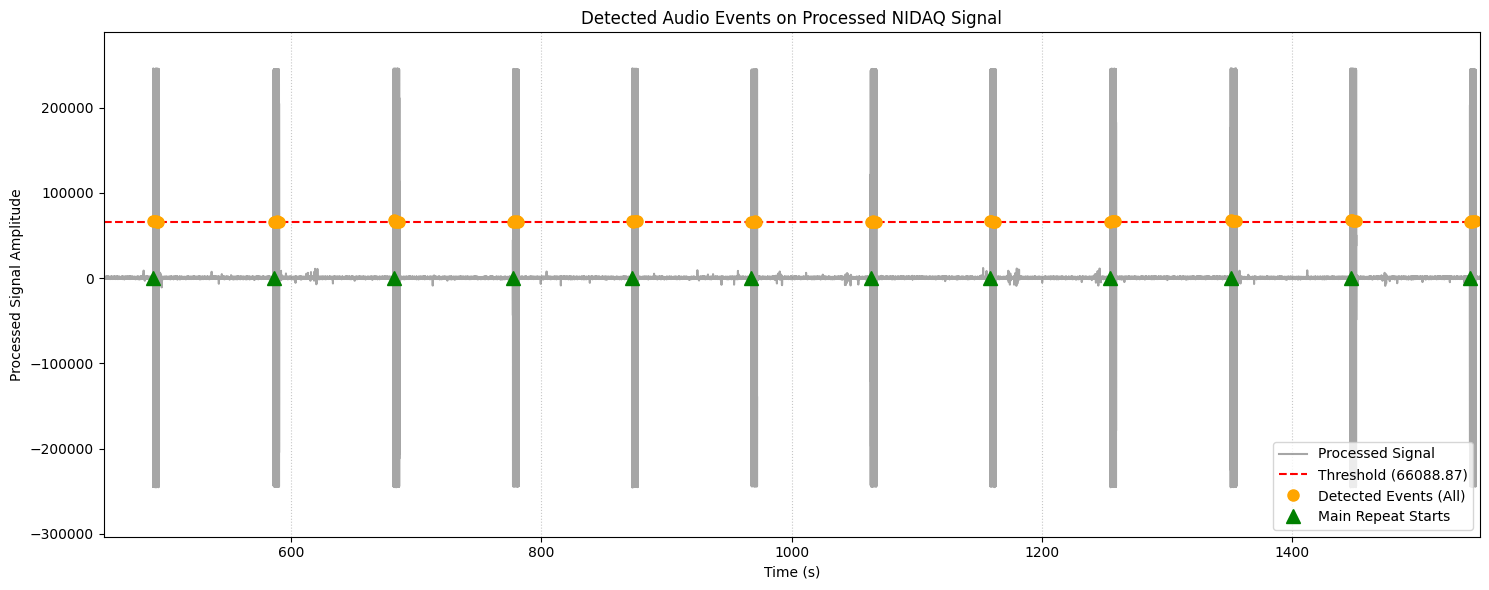

In [40]:
import spikeinterface as si
import spikeinterface.extractors as se
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
# Adjust these based on your signal characteristics and sampling frequency

# Preprocessing
smoothing_window_ms = 1  # Smoothing window in milliseconds (adjust as needed, 0 to disable)

# Detection
threshold_factor = 800 # How many times above noise level to set threshold (adjust based on SNR)
debounce_interval_ms = 600 # Minimum time between detected events (ms) - should be < 500ms

# Hierarchy Identification
expected_sub_repeat_interval_s = 0.9 # Expected time between sub-repeats (seconds)
sub_repeat_interval_tolerance_s = 0.2 # Tolerance for sub-repeat interval (seconds)
# Assume gap between main repeats is significantly larger than sub-repeat gap + tolerance
main_repeat_separation_threshold_s = 50 # e.g., > 0.8s

# --- Assume 'recording' is your loaded SpikeInterface Recording object ---
# Example loading (replace with your actual loading code)
# recording = se.read_nidq('path/to/your/nidq/recording') 
# Or if already loaded:
# recording = my_loaded_recording_object 

# --- Make sure you have a recording object for this example ---
# Creating a dummy recording for demonstration if you don't have one loaded
try:
    recording # Check if recording exists
except NameError:
    print("Creating a dummy recording for demonstration purposes.")
    sampling_frequency = 30000 # Hz
    traces = np.random.randn(sampling_frequency * 70, 1) * 0.1 # 60 seconds of noise
    # Add some simulated events (replace with your actual data)
    event_times_s = []
    t_start = 5.0
    for main_rep in range(3): # Simulate 3 main repeats instead of 25
        main_start = t_start
        for sub_rep in range(5):
             start_idx = int((main_start + sub_rep * 0.6) * sampling_frequency) # Approx 0.5s silence + 0.1s signal
             end_idx = start_idx + int(0.1 * sampling_frequency) # 100ms signal
             if end_idx < len(traces):
                 traces[start_idx:end_idx, 0] += np.sin(np.linspace(0, 10*np.pi, end_idx-start_idx)) * 1.0 # Add signal burst
             event_times_s.append(main_start + sub_rep * 0.6)
        t_start += 5 * 0.6 + 1.0 # Add longer gap between main repeats
    recording = se.NumpyRecording([traces], sampling_frequency=sampling_frequency)
    print(f"Dummy event times: {event_times_s}")
# --------------------------------------------------------------------

# --- Select the relevant channel ---
# If your NIDAQ signal is on a specific channel, select it.
# Replace 'channel_id_of_interest' with the actual ID if known.
# If it's single channel, channel_ids[0] should work.
if len(recording.get_channel_ids()) > 0:
    # Option 1: Choose a specific channel ID (replace 'your_channel_id')
    # channel_id_to_use = 'your_channel_id' 
    # Option 2: Just use the first channel (common for Aux signals)
    channel_id_to_use = recording.get_channel_ids()[0] 
    print(f"Using channel ID: {channel_id_to_use}")
elif len(recording.get_channel_ids()) == 1:
     channel_id_to_use = recording.get_channel_ids()[0]
     print(f"Using the only available channel ID: {channel_id_to_use}")
else:
    raise ValueError("Recording has no channels!")

# Ensure we work with a single channel recording view
recording_ch = recording.channel_slice([channel_id_to_use])

# --- Get Signal Data ---
fs = recording_ch.get_sampling_frequency()
print(f"Sampling frequency: {fs} Hz")

# Process in chunks if the recording is very long to avoid memory issues
# For simplicity, loading all at once here. Adapt if needed.
print("Loading traces...")
signal = recording_ch.get_traces(segment_index=0, return_scaled=True).flatten()
times = recording_ch.get_times(segment_index=0)
print(f"Signal loaded. Duration: {times[-1]:.2f} s, Samples: {len(signal)}")

# --- 1. Preprocessing ---
print("Preprocessing signal...")
# Rectify (take absolute value)
processed_signal = np.abs(signal)

# Optional: Smoothing (moving average)
window_samples = int(smoothing_window_ms * fs / 1000)
if window_samples > 1:
    print(f"Applying moving average smoothing with window: {window_samples} samples ({smoothing_window_ms} ms)")
    processed_signal = np.convolve(processed_signal, np.ones(window_samples)/window_samples, mode='same')
else:
    print("Smoothing disabled or window too small.")

# --- 2. Thresholding ---
print("Calculating detection threshold...")
# Estimate noise level using Median Absolute Deviation (MAD) for robustness
median_val = np.median(processed_signal)
mad = np.median(np.abs(processed_signal - median_val))

if mad == 0:
    # Handle cases with very little noise or flat signal
    noise_level_est = np.std(processed_signal) 
    print(f"Warning: MAD is zero. Using standard deviation {noise_level_est:.4g} as noise estimate.")
    if noise_level_est == 0:
         raise ValueError("Signal appears to be completely flat. Cannot set threshold.")
else:
    # Convert MAD to equivalent standard deviation for Gaussian noise
    noise_level_est = mad * 1.4826 
    
threshold = median_val + threshold_factor * noise_level_est
print(f"Estimated noise level (robust std dev): {noise_level_est:.4g}")
print(f"Calculated threshold: {threshold:.4g}")

# Find samples where the signal crosses *above* the threshold
above_threshold = processed_signal > threshold
crossings_indices = np.where(np.diff(above_threshold.astype(int)) > 0)[0] + 1 # Add 1 to get the first index *above* threshold

print(f"Found {len(crossings_indices)} potential threshold crossings.")

# --- 3. Debouncing ---
print("Debouncing events...")
debounce_samples = int(debounce_interval_ms * fs / 1000)
if len(crossings_indices) > 0:
    event_indices = [crossings_indices[0]]
    for idx in crossings_indices[1:]:
        if idx - event_indices[-1] >= debounce_samples:
            event_indices.append(idx)
    event_indices = np.array(event_indices)
else:
    event_indices = np.array([])

event_times = event_indices / fs # Convert sample indices to time in seconds
print(f"Found {len(event_times)} events after debouncing.")

# --- 4. Hierarchical Grouping ---
print("Identifying main and sub-repeat structure...")
sub_repeat_start_times = [] # List of arrays, each array contains times for one main repeat
main_repeat_start_times = []

if len(event_times) > 0:
    # First event always starts a main repeat and its first sub-repeat
    main_repeat_start_times.append(event_times[0])
    current_sub_group = [event_times[0]]

    if len(event_times) > 1:
        inter_event_intervals = np.diff(event_times)

        for i, interval in enumerate(inter_event_intervals):
            current_event_time = event_times[i + 1]

            # Check if interval suggests a new main repeat
            if interval > main_repeat_separation_threshold_s:
                # End of the previous main repeat's sub-group
                sub_repeat_start_times.append(np.array(current_sub_group))
                # Start of a new main repeat
                main_repeat_start_times.append(current_event_time)
                current_sub_group = [current_event_time] # Start new sub-group
            # Check if interval matches expected sub-repeat separation
            elif abs(interval - expected_sub_repeat_interval_s) <= sub_repeat_interval_tolerance_s:
                current_sub_group.append(current_event_time)
            else:
                # Interval doesn't fit either pattern
                print(f"Warning: Unexpected interval {interval:.3f}s between event at {event_times[i]:.3f}s and {current_event_time:.3f}s. "
                      f"This event might be noise or indicate timing issues. It won't be grouped.")
                # Decide how to handle - here we just don't add it to the current_sub_group

    # Add the last collected sub-group
    if current_sub_group:
        sub_repeat_start_times.append(np.array(current_sub_group))

# Convert main repeats list to numpy array for consistency
main_repeat_start_times = np.array(main_repeat_start_times)

print("\n--- Results ---")
print(f"Detected {len(main_repeat_start_times)} main repeats.")
print(f"Detected {sum(len(sub_group) for sub_group in sub_repeat_start_times)} total sub-repeats.")

print("\nStart times of Main Repeats (seconds):")
print(main_repeat_start_times)

print("\nStart times of Sub-Repeats within each Main Repeat (seconds):")
for i, sub_group in enumerate(sub_repeat_start_times):
    print(f"  Main Repeat {i+1} (starts at {main_repeat_start_times[i]:.3f}s):")
    print(f"    {sub_group}")

# --- Optional: Verification Plot ---
print("\nGenerating verification plot...")
plt.figure(figsize=(15, 6))
plt.plot(times- min(times),signal, label='Processed Signal', alpha=0.7, color='gray')
plt.axhline(threshold, color='r', linestyle='--', label=f'Threshold ({threshold:.2f})')

# Plot detected events (all after debouncing)
plt.plot(event_times, processed_signal[event_indices], 'o', color='orange', markersize=8, label='Detected Events (All)')

# Mark main repeat starts differently
if len(main_repeat_start_times) > 0:
     main_repeat_indices = np.searchsorted(times, main_repeat_start_times)
     # Clip indices to be within bounds
     main_repeat_indices = np.clip(main_repeat_indices, 0, len(processed_signal) - 1)
     plt.plot(main_repeat_start_times, processed_signal[main_repeat_indices], '^', color='green', markersize=10, label='Main Repeat Starts')


plt.title('Detected Audio Events on Processed NIDAQ Signal')
plt.xlabel('Time (s)')
plt.ylabel('Processed Signal Amplitude')
plt.legend()
plt.grid(True, axis='x', linestyle=':', alpha=0.7)
# Optional: Zoom into a specific time range if needed
plt.xlim(450, 1550)
#plt.ylim(-3000,3000)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd # Add this import at the top of your script if not already there
import os # To handle file paths

# --- Add this section after the results printing and plotting ---

print("\n--- Exporting Results to CSV ---")

# Define output filenames
output_dir = "C:/Users/Freitag/Desktop" # Save in the current directory, change if needed
combined_csv_filename = os.path.join(output_dir, "audio_event_times_combined.csv")
# Optional: Define names if saving as two separate files
# main_repeats_csv_filename = os.path.join(output_dir, "main_repeat_times.csv")
# sub_repeats_csv_filename = os.path.join(output_dir, "sub_repeat_times_detailed.csv")


# --- Option 1: Save as a Single Combined CSV (Recommended) ---
# Structure: Each row is a sub-repeat, with info about its parent main repeat.
event_data_list = []
if len(main_repeat_start_times) > 0 and len(sub_repeat_start_times) == len(main_repeat_start_times):
    for i, main_start_time in enumerate(main_repeat_start_times):
        # Ensure we have sub-repeat data for this main repeat
        if i < len(sub_repeat_start_times):
             current_sub_group = sub_repeat_start_times[i]
             for j, sub_start_time in enumerate(current_sub_group):
                 event_data_list.append({
                     'main_repeat_index': i + 1, # 1-based index for main repeat
                     'main_repeat_start_time_s': main_start_time,
                     'sub_repeat_index_within_main': j + 1, # 1-based index for sub-repeat within main
                     'sub_repeat_start_time_s': sub_start_time
                 })
        else:
             print(f"Warning: Missing sub-repeat data for main repeat index {i} (start time {main_start_time}). Skipping.")
             # Optionally add a row indicating the main repeat was found but sub-repeats were missing/problematic
             # event_data_list.append({
             #     'main_repeat_index': i + 1,
             #     'main_repeat_start_time_s': main_start_time,
             #     'sub_repeat_index_within_main': None, # Or 0, or NaN
             #     'sub_repeat_start_time_s': None # Or NaN
             # })


    if event_data_list:
        # Create DataFrame
        combined_df = pd.DataFrame(event_data_list)
        
        # Save to CSV
        try:
            combined_df.to_csv(combined_csv_filename, index=False, float_format='%.6f')
            print(f"Successfully saved combined event data to: {combined_csv_filename}")
        except Exception as e:
            print(f"Error saving combined CSV file: {e}")
    else:
        print("No event data structures generated to save.")
        
elif len(main_repeat_start_times) > 0:
     print("Warning: Mismatch between number of main repeats and sub-repeat groups. Saving main repeats only.")
     # Fallback to saving just main repeats if sub-repeat structure is inconsistent
     main_df = pd.DataFrame({'main_repeat_start_time_s': main_repeat_start_times})
     try:
        main_df.to_csv(os.path.join(output_dir, "main_repeat_times_only.csv"), index=False, float_format='%.6f')
        print(f"Successfully saved main repeat times only to: {os.path.join(output_dir, 'main_repeat_times_only.csv')}")
     except Exception as e:
        print(f"Error saving main repeats CSV file: {e}")
else:
    print("No main repeats detected, skipping CSV export.")


